Saved low-frequency component as lf_component1.png


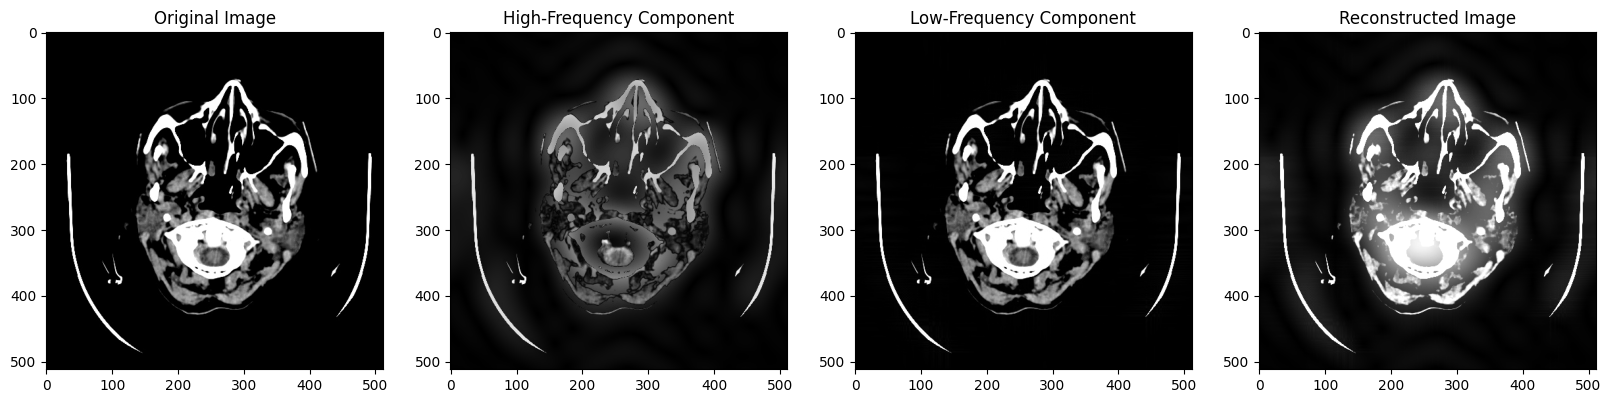

In [33]:

def hf_component(image_path,centersize, save_hf='hf_component1.png'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    
    real_part = np.real(fft_shift)
    imag_part = np.imag(fft_shift)

    
    center_size = centersize
    start = (512 - center_size) // 2
    end = start + center_size

    
    hf_mask = np.ones((512, 512), dtype=np.uint8)
    hf_mask[start:end, start:end] = 0.9  
    hf_fft = (real_part * hf_mask) + 1j * (imag_part * hf_mask)
    hf_ishift = np.fft.ifftshift(hf_fft)
    hf_img = np.abs(np.fft.ifft2(hf_ishift))
    hf_img = cv2.normalize(hf_img, None, 0, 255, cv2.NORM_MINMAX)
    hf_img = np.uint8(hf_img)
    cv2.imwrite(save_hf, hf_img)
    
def lf_component(image_path,centersize, save_lf='lf_component1.png'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    

    real_part = np.real(fft_shift)
    imag_part = np.imag(fft_shift)

    
    center_size = centersize
    start = (512 - center_size) // 2
    end = start + center_size

    
    lf_mask = np.zeros((512, 512), dtype=np.uint8)

    lf_mask[start:end, start:end] = 1  
    lf_fft = (real_part * lf_mask) + 1j * (imag_part * lf_mask)
    
    
    lf_ishift = np.fft.ifftshift(lf_fft)
    lf_img = np.abs(np.fft.ifft2(lf_ishift))
    cv2.imwrite(save_lf, lf_img)
    print(f"Saved low-frequency component as {save_lf}")




import cv2
import numpy as np

def combine_lf_hf(lf_path, hf_path, save_hd='hd_image.png'):

    lf_img = cv2.imread(lf_path, cv2.IMREAD_GRAYSCALE)
    hf_img = cv2.imread(hf_path, cv2.IMREAD_GRAYSCALE)
    
    hd_img = cv2.add(lf_img, hf_img)
    
    
    hd_imgn = np.uint8(cv2.normalize(hd_img, None, 0, 255, cv2.NORM_MINMAX))
    
    
    cv2.imwrite(save_hd, hd_img)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(cv2.imread("data\HR_CT\image_001_flip_6..jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[1].imshow(cv2.imread("hf_component1.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[2].imshow(cv2.imread("lf_component1.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[3].imshow(cv2.imread("hd_image.png", cv2.IMREAD_GRAYSCALE), cmap='gray')

    axs[0].set_title('Original Image')
    axs[1].set_title('High-Frequency Component')
    axs[2].set_title('Low-Frequency Component')
    axs[3].set_title('Reconstructed Image')
    
    plt.show()
    



hf_component("data\HR_CT\image_001_flip_6..jpg",10)
lf_component("data\HR_CT\image_001_flip_6..jpg",502)

combine_lf_hf("lf_component1.png", "hf_component1.png")





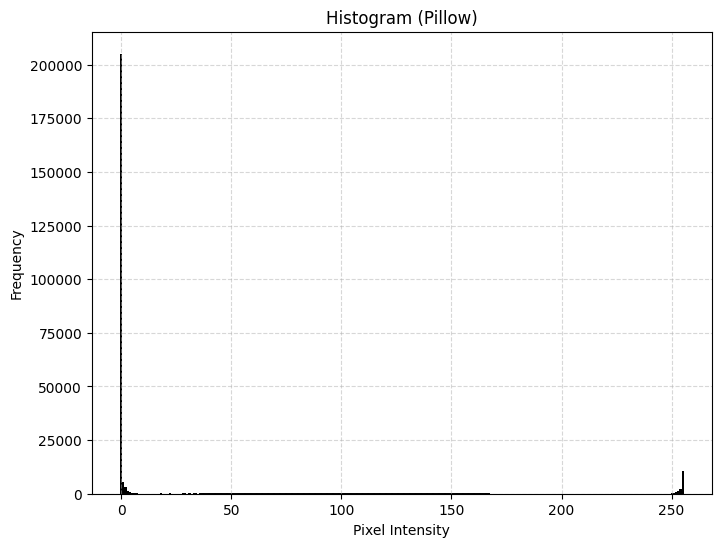

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

def pillow_histogram(image_path):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    hist = img.histogram()

    plt.figure(figsize=(8, 6))
    plt.bar(range(256), hist[:256], color='black', width=1)
    plt.title("Histogram (Pillow)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

pillow_histogram("data\HR_CT\image_001_flip_6..jpg")



# Example usage
#plot_histogram("data\HR_CT\image_001_flip_6..jpg")


Saved high-frequency component as hf_component_gaussian.png


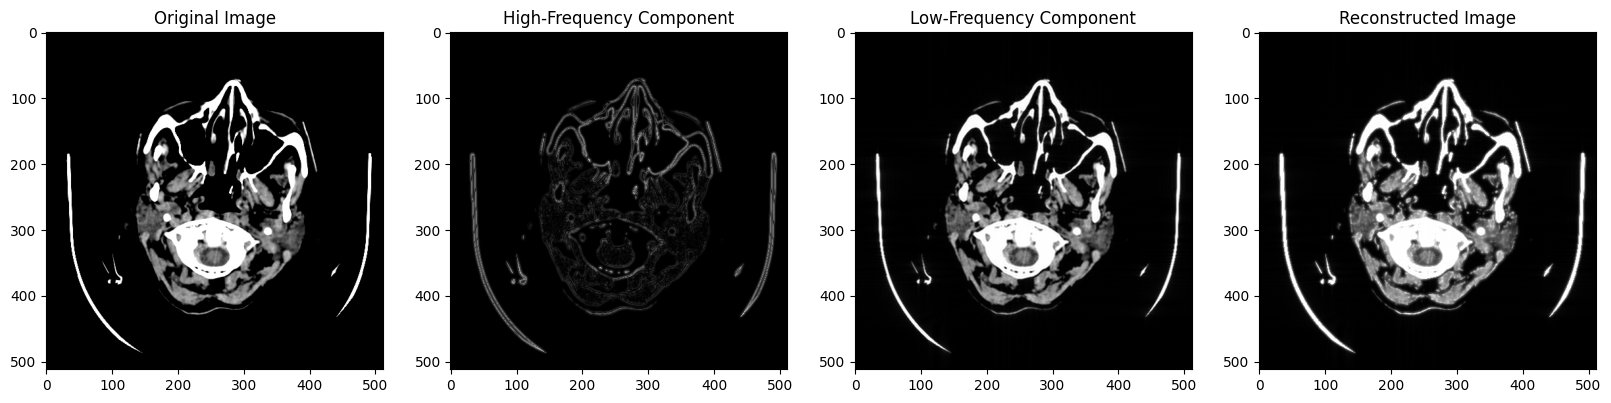

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_mask(shape, centersize, high_pass=True):
    """Generates a smooth Gaussian mask for frequency filtering."""
    h, w = shape
    y, x = np.ogrid[:h, :w]
    
    center_y, center_x = h // 2, w // 2
    sigma = centersize/2  # Standard deviation of Gaussian

    # Create Gaussian function
    gaussian = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

    if high_pass:
        return 1 - gaussian  # Keep high frequencies
    return gaussian  # Keep low frequencies

def hf_component(image_path, centersize, save_hf='hf_component_gaussian.png'):
    """Extracts the high-frequency component using a Gaussian mask."""
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or cannot be read.")

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    # Apply Gaussian high-pass filter
    hf_mask = gaussian_mask(img.shape, centersize, high_pass=True)
    hf_fft = fft_shift * hf_mask

    # Inverse FFT
    hf_ishift = np.fft.ifftshift(hf_fft)
    hf_img = np.abs(np.fft.ifft2(hf_ishift))

    # Normalize and save
    hf_img = cv2.normalize(hf_img, None, 0, 255, cv2.NORM_MINMAX)
    hf_img = np.uint8(hf_img)
    cv2.imwrite(save_hf, hf_img)
    print(f"Saved high-frequency component as {save_hf}")

def lf_component(image_path, centersize, save_lf='lf_component_gaussian.png'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    

    real_part = np.real(fft_shift)
    imag_part = np.imag(fft_shift)

    
    center_size = centersize
    start = (512 - center_size) // 2
    end = start + center_size

    
    lf_mask = np.zeros((512, 512), dtype=np.uint8)

    lf_mask[start:end, start:end] = 1  
    lf_fft = (real_part * lf_mask) + 1j * (imag_part * lf_mask)
    
    
    lf_ishift = np.fft.ifftshift(lf_fft)
    lf_img = np.abs(np.fft.ifft2(lf_ishift))
    cv2.imwrite(save_lf, lf_img)


def combine_lf_hf(lf_path, hf_path, save_hd='hd_image.png'):

    lf_img = cv2.imread(lf_path, cv2.IMREAD_GRAYSCALE)
    hf_img = cv2.imread(hf_path, cv2.IMREAD_GRAYSCALE)
    
    hd_img = cv2.add(lf_img, hf_img)
    
    
    hd_img = np.uint8(cv2.normalize(hd_img, None, 0, 255, cv2.NORM_MINMAX))
    
    
    cv2.imwrite(save_hd, hd_img)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(cv2.imread("data\HR_CT\image_001_flip_6..jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[1].imshow(cv2.imread("hf_component_gaussian.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[2].imshow(cv2.imread("lf_component_gaussian.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[3].imshow(cv2.imread("hd_image.png", cv2.IMREAD_GRAYSCALE), cmap='gray')

    axs[0].set_title('Original Image')
    axs[1].set_title('High-Frequency Component')
    axs[2].set_title('Low-Frequency Component')
    axs[3].set_title('Reconstructed Image')
    
    plt.show()
    



hf_component("data\HR_CT\image_001_flip_6..jpg",100)
lf_component("data\HR_CT\image_001_flip_6..jpg",256)

combine_lf_hf("hf_component_gaussian.png", "lf_component_gaussian.png")

In [47]:
#calculate ssim psnr
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_metrics(image_path, reference_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    ref = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)

    # Calculate SSIM and PSNR
    ssim_val = ssim(ref, img, data_range=img.max() - img.min())
    psnr_val = psnr(ref, img, data_range=img.max() - img.min())

    return ssim_val, psnr_val

ssim_val, psnr_val = calculate_metrics("hd_image.png", "data\HR_CT\image_001_flip_6..jpg")
ssim_valhf, psnr_valhf = calculate_metrics("hf_component_gaussian.png", "data\HR_CT\image_001_flip_6..jpg")
ssim_vallf, psnr_vallf = calculate_metrics("lf_component_gaussian.png", "data\HR_CT\image_001_flip_6..jpg")
print(f"SSIM HF: {ssim_valhf:.4f}")
print(f"PSNR HF: {psnr_valhf:.4f}")
print(f"SSIM LF: {ssim_vallf:.4f}")
print(f"PSNR LF: {psnr_vallf:.4f}")

print(f"SSIM Reconstructed: {ssim_val:.4f}")
print(f"PSNR Reconstructed: {psnr_val:.4f}")

SSIM HF: 0.7353
PSNR HF: 11.8285
SSIM LF: 0.8296
PSNR LF: 28.6472
SSIM Reconstructed: 0.7811
PSNR Reconstructed: 21.8260


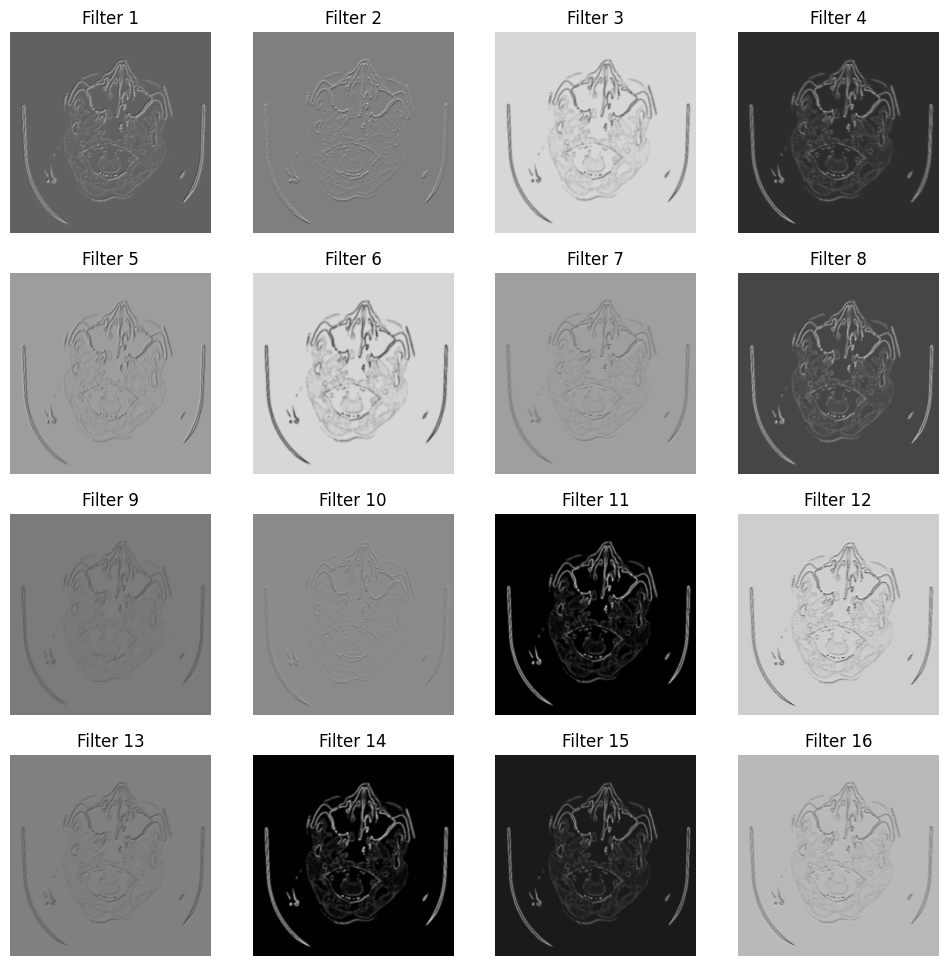

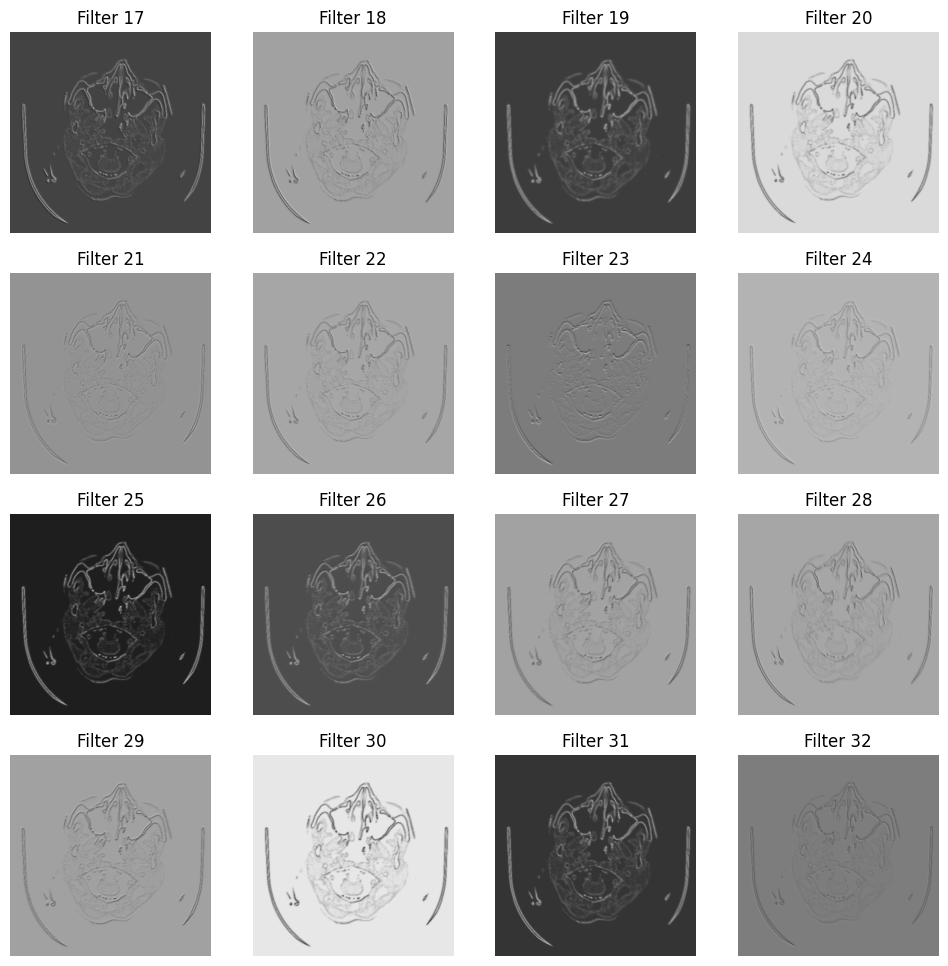

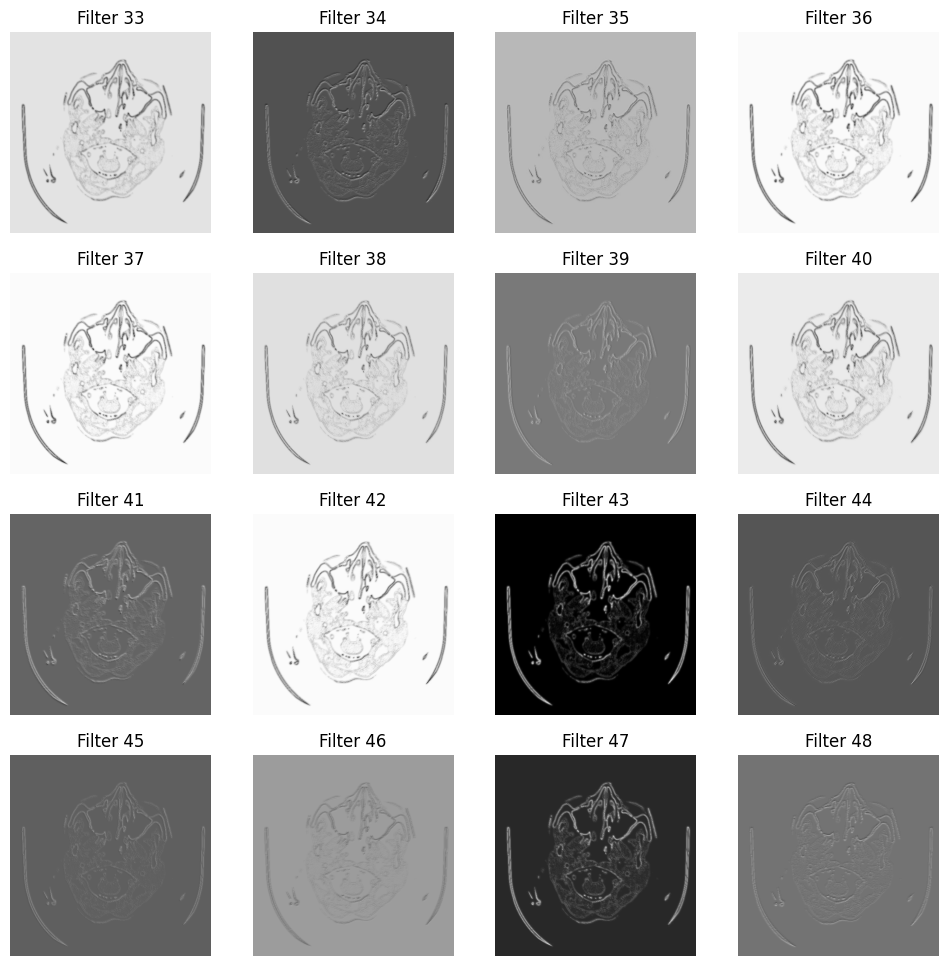

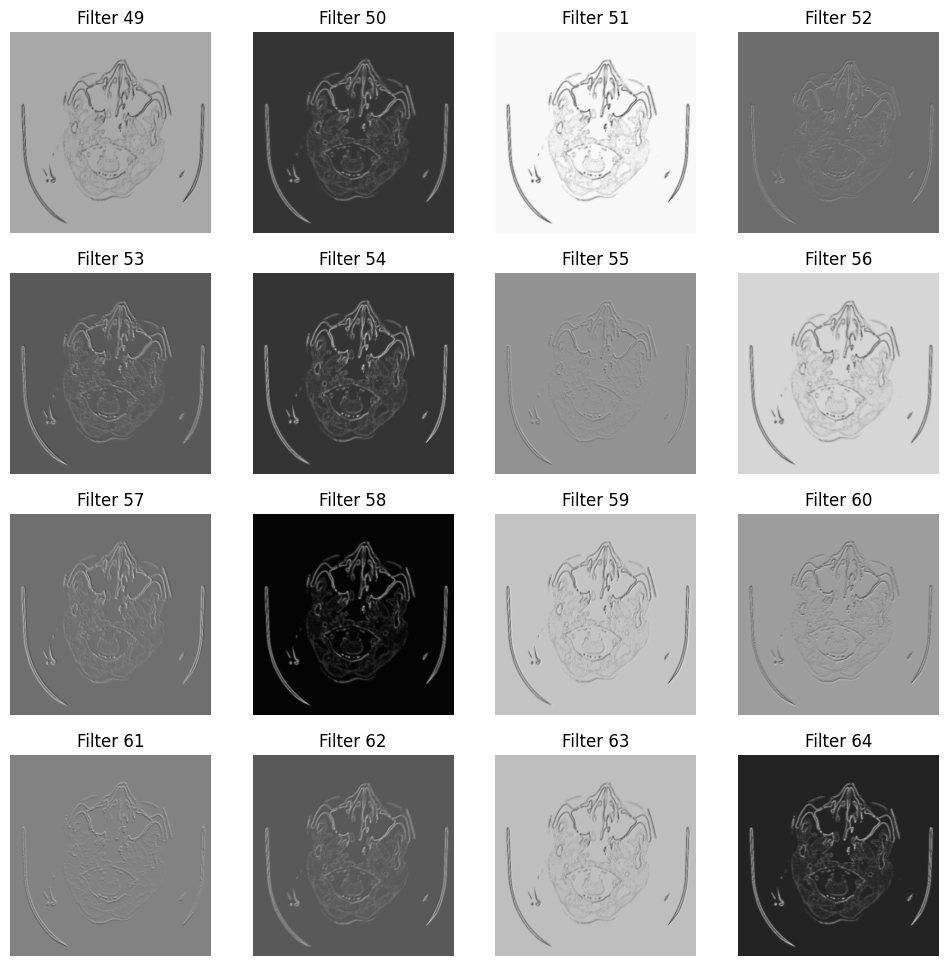

In [56]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define a CNN with a single convolutional layer with 64 filters
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)  # 64 filters
        self.relu = nn.ReLU()
        self.conv = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)  # 64 filters

    def forward(self, x):
        return self.conv(x)

# Load HF image
hf_image_path = "hf_component_gaussian.png"  # Update with your HF component image path
hf_img = cv2.imread(hf_image_path, cv2.IMREAD_GRAYSCALE)

# Normalize and convert to tensor
hf_img = hf_img.astype(np.float32) / 255.0
hf_img = torch.tensor(hf_img).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Create CNN model
model = SimpleCNN()

# Initialize filters with random values for demonstration (or use predefined filters)
with torch.no_grad():
    model.conv.weight[:] = torch.randn_like(model.conv.weight)  # Random initialization

# Apply convolution
output = model(hf_img)


output_imgs = output.squeeze().detach().numpy()  

# Display 16 filter outputs at a time
num_filters = 64
num_cols = 4
num_rows = 4

for i in range(0, num_filters, 16):  # Loop through filters in groups of 16
    plt.figure(figsize=(12, 12))
    for j in range(16):
        if i + j >= num_filters:
            break
        plt.subplot(num_rows, num_cols, j + 1)
        plt.imshow(output_imgs[i + j], cmap="gray")
        plt.title(f"Filter {i + j + 1}")
        plt.axis("off")
    plt.show()


Saved high-frequency component as hf_component_gaussian.png
Saved low-frequency component as lf_component_gaussian.png


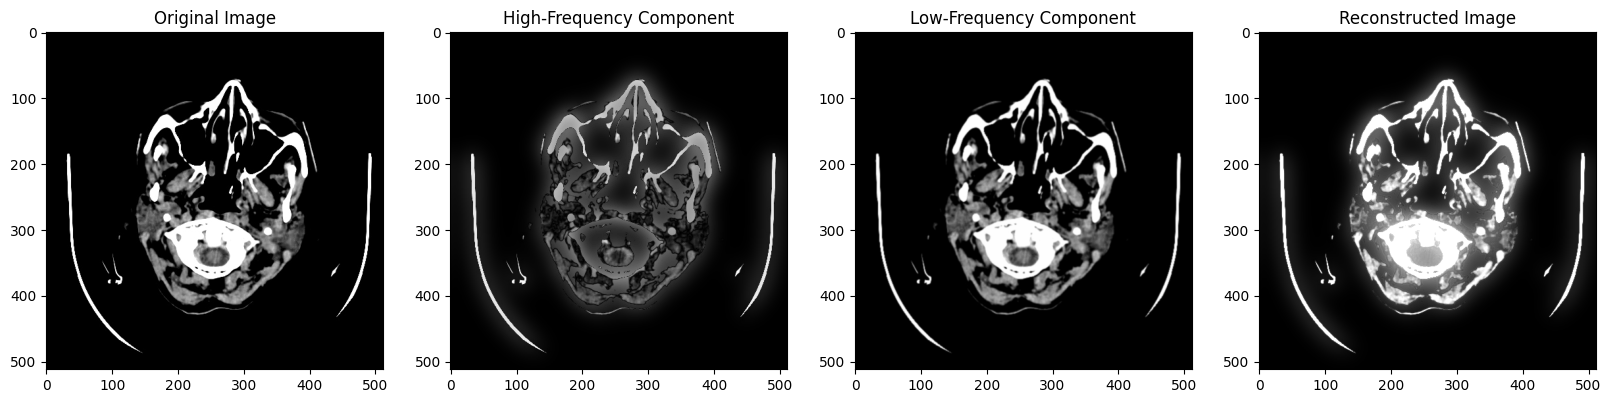

In [14]:
import cv2
import numpy as np

def gaussian_mask(shape, centersize, high_pass=True):
    """Generates a smooth Gaussian mask for frequency filtering."""
    h, w = shape
    y, x = np.ogrid[:h, :w]
    
    center_y, center_x = h // 2, w // 2
    sigma = centersize / 2  # Standard deviation of Gaussian

    # Create Gaussian function
    gaussian = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

    if high_pass:
        return 1 - gaussian  # Keep high frequencies
    return gaussian  # Keep low frequencies

def hf_component(image_path, centersize, save_hf='hf_component_gaussian.png'):
    """Extracts the high-frequency component using a Gaussian mask."""
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or cannot be read.")

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    # Apply Gaussian high-pass filter
    hf_mask = gaussian_mask(img.shape, centersize, high_pass=True)
    hf_fft = fft_shift * hf_mask

    # Inverse FFT
    hf_ishift = np.fft.ifftshift(hf_fft)
    hf_img = np.abs(np.fft.ifft2(hf_ishift))

    # Normalize and save
    hf_img = cv2.normalize(hf_img, None, 0, 255, cv2.NORM_MINMAX)
    hf_img = np.uint8(hf_img)
    cv2.imwrite(save_hf, hf_img)
    print(f"Saved high-frequency component as {save_hf}")

def lf_component(image_path, centersize, save_lf='lf_component_gaussian.png'):
    """Extracts the low-frequency component using a Gaussian mask."""
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or cannot be read.")

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    # Apply Gaussian low-pass filter
    lf_mask = gaussian_mask(img.shape, centersize, high_pass=False)
    lf_fft = fft_shift * lf_mask

    # Inverse FFT
    lf_ishift = np.fft.ifftshift(lf_fft)
    lf_img = np.abs(np.fft.ifft2(lf_ishift))

    # Normalize and save
    lf_img = cv2.normalize(lf_img, None, 0, 255, cv2.NORM_MINMAX)
    lf_img = np.uint8(lf_img)
    cv2.imwrite(save_lf, lf_img)
    print(f"Saved low-frequency component as {save_lf}")

def combine_lf_hf(lf_path, hf_path, save_hd='hd_image.png'):

    lf_img = cv2.imread(lf_path, cv2.IMREAD_GRAYSCALE)
    hf_img = cv2.imread(hf_path, cv2.IMREAD_GRAYSCALE)
    
    hd_img = cv2.add(lf_img, hf_img)
    
    
    hd_imgn = np.uint8(cv2.normalize(hd_img, None, 0, 255, cv2.NORM_MINMAX))
    
    
    cv2.imwrite(save_hd, hd_img)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(cv2.imread("data\HR_CT\image_001_flip_6..jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[1].imshow(cv2.imread("hf_component_gaussian.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[2].imshow(cv2.imread("lf_component_gaussian.png", cv2.IMREAD_GRAYSCALE), cmap='gray')
    axs[3].imshow(cv2.imread("hd_image.png", cv2.IMREAD_GRAYSCALE), cmap='gray')

    axs[0].set_title('Original Image')
    axs[1].set_title('High-Frequency Component')
    axs[2].set_title('Low-Frequency Component')
    axs[3].set_title('Reconstructed Image')
    
    plt.show()
    



hf_component("data\HR_CT\image_001_flip_6..jpg",10)
lf_component("data\HR_CT\image_001_flip_6..jpg",256)

combine_lf_hf("hf_component_gaussian.png", "lf_component_gaussian.png")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hf_component_gaussian(image_path, centersize, save_hf='hf_component_gaussian.png'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    real_part = np.real(fft_shift)
    imag_part = np.imag(fft_shift)

    # Create Gaussian Mask for HF Filtering
    center = 512 // 2
    x, y = np.meshgrid(np.linspace(-1, 1, 512), np.linspace(-1, 1, 512))
    d = np.sqrt(x*x + y*y)
    
    # Gaussian function (low frequencies are dampened)
    sigma = centersize / 512  # Adjust sigma based on the crop size
    hf_mask = 1 - np.exp(- (d ** 2) / (2 * sigma ** 2))  # High-pass Gaussian filter

    # Apply Gaussian Mask
    hf_fft = (real_part * hf_mask) + 1j * (imag_part * hf_mask)

    # Inverse Transform
    hf_ishift = np.fft.ifftshift(hf_fft)
    hf_img = np.abs(np.fft.ifft2(hf_ishift))

    # Normalize and Save
    hf_img = cv2.normalize(hf_img, None, 0, 255, cv2.NORM_MINMAX)
    hf_img = np.uint8(hf_img)
    cv2.imwrite(save_hf, hf_img)

    # Visualization
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(hf_mask, cmap='jet')
    plt.title("Gaussian HF Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(hf_img, cmap='gray')
    plt.title("High-Frequency Component")
    plt.axis("off")

    plt.show()

    print(f"Saved HF component as {save_hf}")

hf_component_gaussian("your_image.png", centersize=128)


Saved HD image as hd_image.png


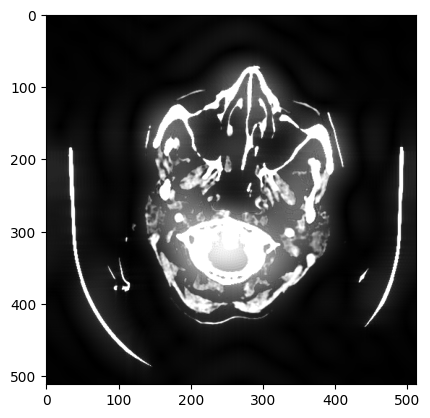

In [15]:
import cv2
import numpy as np

def combine_lf_hf(lf_path, hf_path, save_hd='hd_image.png'):
    # Load LF and HF images
    lf_img = cv2.imread(lf_path, cv2.IMREAD_GRAYSCALE)
    hf_img = cv2.imread(hf_path, cv2.IMREAD_GRAYSCALE)
    
    if lf_img is None or hf_img is None:
        raise ValueError("One or both images not found or invalid format.")
    
    # Ensure images are 512x512
    if lf_img.shape != (512, 512) or hf_img.shape != (512, 512):
        raise ValueError("Both images must be 512x512.")
    
    # Combine LF and HF components
    hd_img = cv2.add(lf_img, hf_img)
    
    # Normalize the result
    hd_img = np.uint8(cv2.normalize(hd_img, None, 0, 255, cv2.NORM_MINMAX))
    
    # Save the HD image
    cv2.imwrite(save_hd, hd_img)
    
    print(f"Saved HD image as {save_hd}")

# Example usage
combine_lf_hf("lf_component1.png", "hf_component1.png")
plt.imshow(cv2.imread("hd_image.png", cv2.IMREAD_GRAYSCALE), cmap='gray')


In [ ]:
import cv2
import numpy as np

def butterworth_highpass(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    x, y = np.meshgrid(x, y)
    # Compute distance from the center
    distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
    # Butterworth high-pass filter formula
    # H(u,v) = 1 / (1 + (cutoff / D(u,v))^(2*order))
    # For high-pass, we actually want 1 - low-pass response.
    butter_low = 1 / (1 + (distance / cutoff)**(2 * order))
    butter_high = 1 - butter_low
    return butter_high

def process_image_butterworth(image_path, cutoff=50, order=2,
                              save_hf='hf_component_butter.png',
                              save_lf='lf_component_butter.png'):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or invalid format.")
    if img.shape != (512, 512):
        raise ValueError("Input image must be 512x512.")

    # FFT and shift to center frequencies
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    
    # Create Butterworth filters
    rows, cols = img.shape
    # Butterworth low-pass filter (complement of high-pass)
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    x, y = np.meshgrid(x, y)
    crow, ccol = rows//2, cols//2
    distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
    butter_low = 1 / (1 + (distance / cutoff)**(2 * order))
    butter_high = 1 - butter_low  # Complement for high-pass

    # Apply filters in the frequency domain
    lf_fft = fft_shift * butter_low
    hf_fft = fft_shift * butter_high

    # Inverse FFT to reconstruct images
    lf_ishift = np.fft.ifftshift(lf_fft)
    hf_ishift = np.fft.ifftshift(hf_fft)
    lf_img = np.abs(np.fft.ifft2(lf_ishift))
    hf_img = np.abs(np.fft.ifft2(hf_ishift))

    # Normalize and convert to uint8
    lf_img = np.uint8(cv2.normalize(lf_img, None, 0, 255, cv2.NORM_MINMAX))
    hf_img = np.uint8(cv2.normalize(hf_img, None, 0, 255, cv2.NORM_MINMAX))

    cv2.imwrite(save_lf, lf_img)
    cv2.imwrite(save_hf, hf_img)
    
    print(f"Saved Butterworth high-frequency component as {save_hf}")
    print(f"Saved Butterworth low-frequency component as {save_lf}")

# Example usage:
process_image_butterworth("data\HR_CT\image_001_flip_6..jpg", cutoff=100, order=2)
